# Лабораторная работа №2
## Использование современных фреймворков в рекомендательных системах
### Выполнили:
- Елизавета Масленникова
- Никита Коробков
- Татьяна Щеглетова
- Александр Ляшук
- Анастасия Попова
- Ксения Горская
- Николай Канатов
- Екатерина Кузнецова

# Обзор данных

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [39]:
users = pd.read_csv("ml-100k/u.user",sep='|',
                  names=['user_id', 'age', 'sex', 'occupation', 'zip_code'])
ratings = pd.read_csv('ml-100k/u.data',sep='\t', 
                  names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies = pd.read_csv('ml-100k/u.item', sep='|', 
                  names=['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'], 
                  usecols=range(5), encoding="ISO-8859-1")
movielens = pd.merge(users,ratings)
movielens = pd.merge(movielens,movies)
movielens.drop(['video_release_date'], axis=1, inplace=True)

In [3]:
movielens.head()

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...


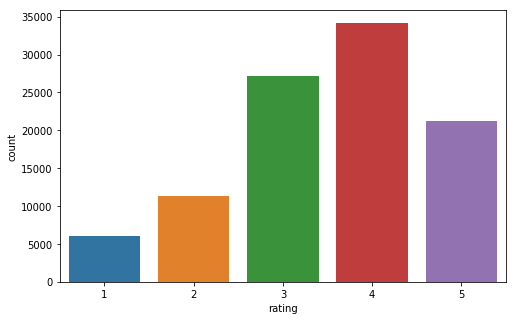

In [42]:
sns.countplot(movielens['rating'])

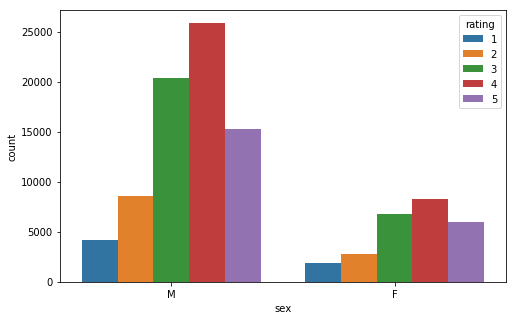

In [41]:
sns.countplot(x='sex', hue = 'rating', data = movielens)

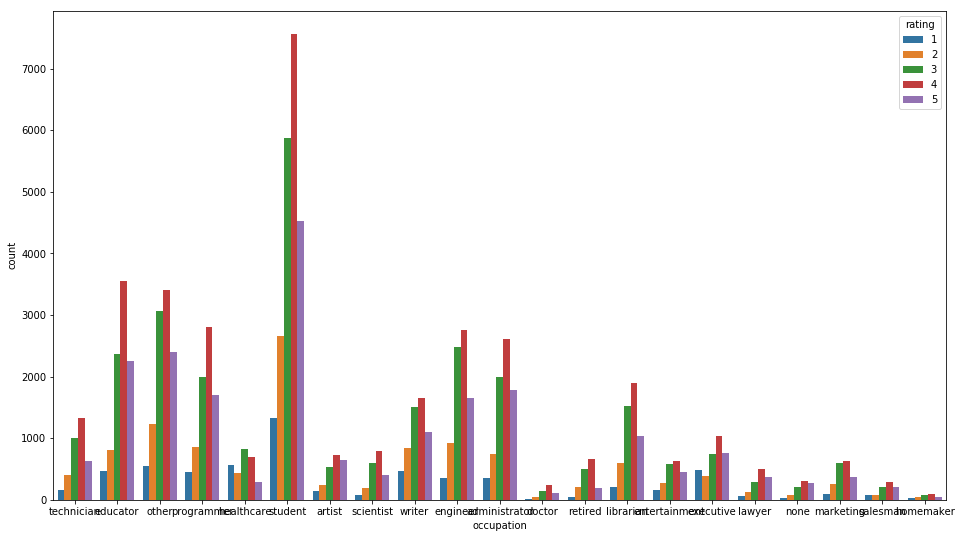

In [38]:
sns.countplot(x='occupation', hue = 'rating', data = movielens)

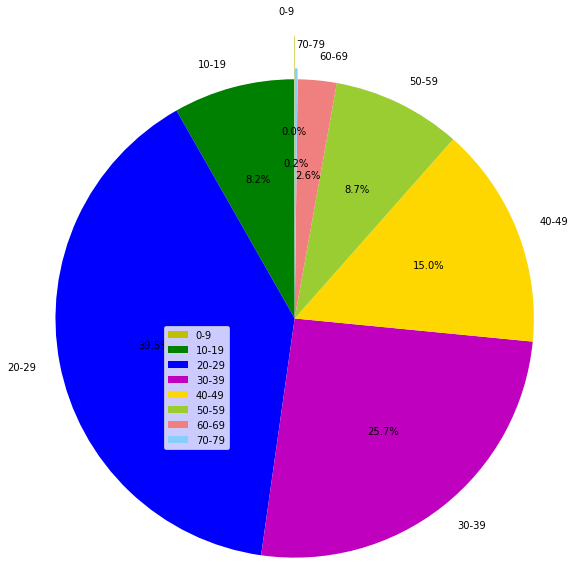

In [11]:
labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
movielens['age_group'] = pd.cut(movielens.age, range(0, 81, 10), right=False, labels=labels)
distage=movielens.groupby('age_group').agg({'rating':[np.size,np.mean]})
colors=["y","g","b","m",'gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(distage['rating']['size'],startangle=90,labels=labels,colors=colors,explode=(0.4,0,0,0,0,0,0,0.1),autopct = '%1.1f%%',radius=2.2)
plt.legend()
plt.show()

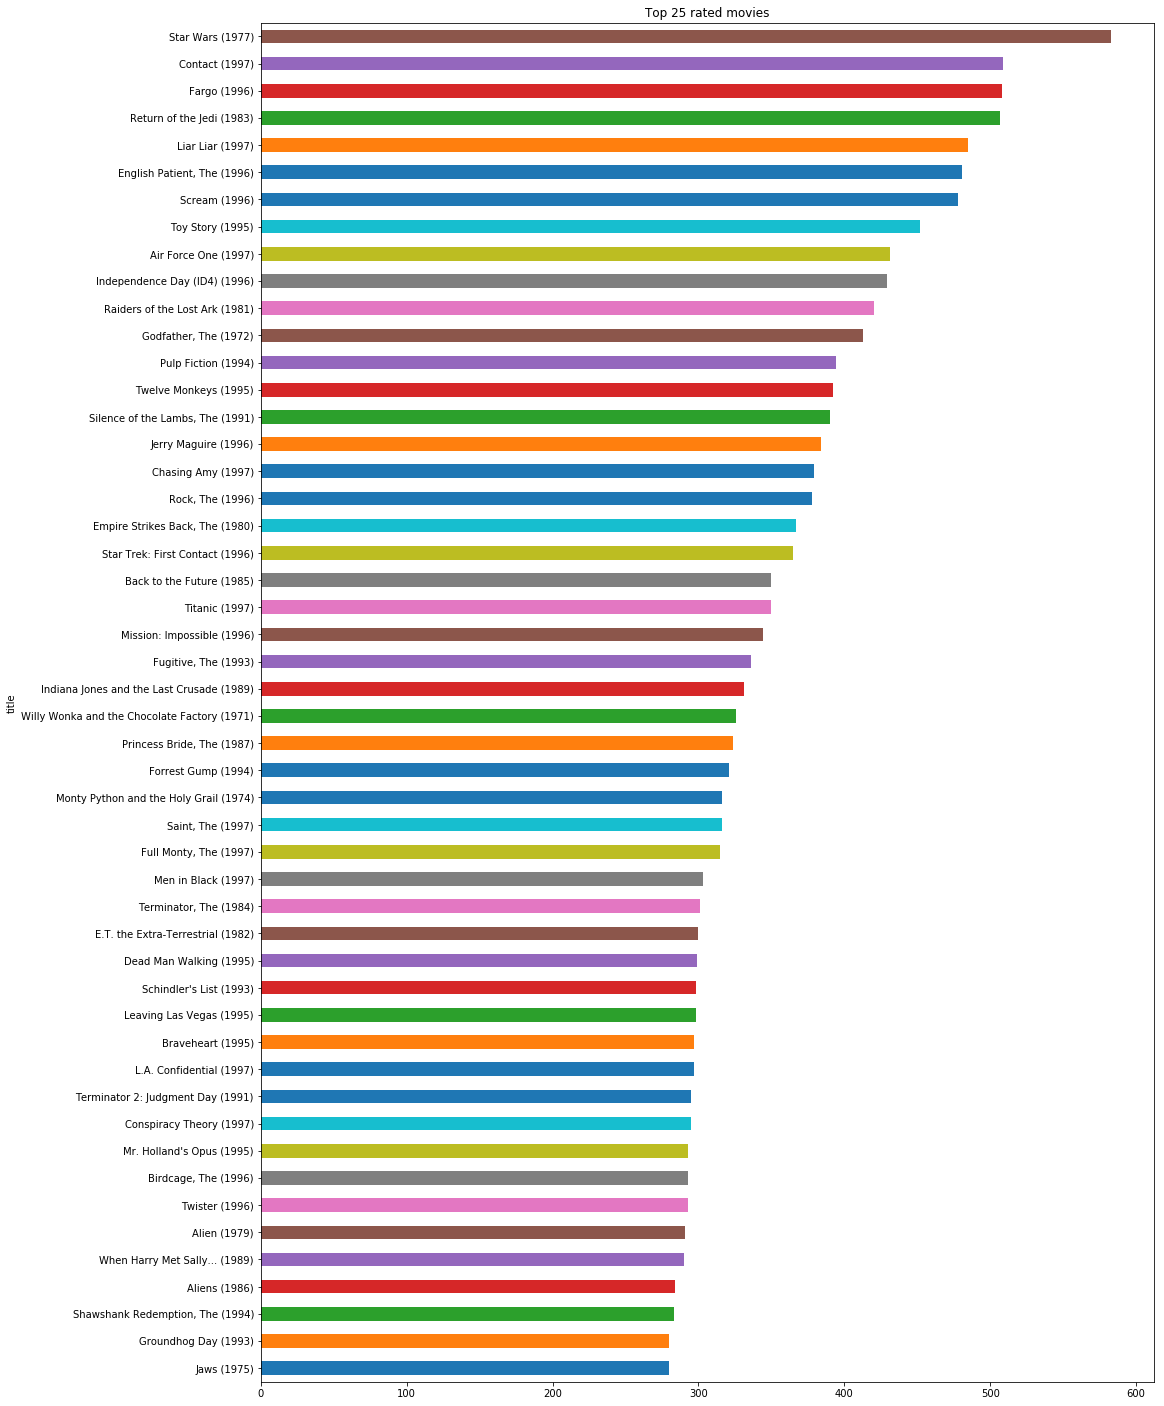

In [6]:
most_rated = movielens.groupby('title').size().sort_values(ascending=False)[:50:][::-1]
most_rated.plot(kind="barh",title="Top 25 rated movies",label="count")

In [12]:
toystory=movielens[movielens.movie_id==1]
toystory.shape
mov1 = movielens.sort_values("movie_id",ascending=True).head(452) ##we have 452 reviews approximately for Toystory
mov1.set_index('movie_id',inplace=True)
by_age = mov1.loc[mov1.index].groupby(['title', 'age_group']).agg([np.size,np.mean])
by_age

user_id                age            rating  \
                              size        mean   size       mean   size   
title            age_group                                                
Toy Story (1995) 10-19       16724  510.729730  16724  17.000000  16724   
                 20-29       85428  508.132275  85428  24.888889  85428   
                 30-39       54692  464.487603  54692  33.809917  54692   
                 40-49       31640  433.028571  31640  44.528571  31640   
                 50-59       13108  380.482759  13108  52.689655  13108   
                 60-69        2260  471.800000   2260  61.000000   2260   
                 70-79         452  767.000000    452  70.000000    452   

                                     timestamp                
                                mean      size          mean  
title            age_group                                    
Toy Story (1995) 10-19      3.621622     16724  8.831738e+08  
                 20-29      3.920635     85428  8.824191e+08  
                 30-39      4.033058     54692  8.821978e+08  
                 40-49      3.700000     31640  8.841052e+08  
                 50-59      3.758621     13108  8.834829e+08  
                 60-69      3.400000      2260  8.855238e+08  
                 70-79      5.000000       452  8.914628e+08

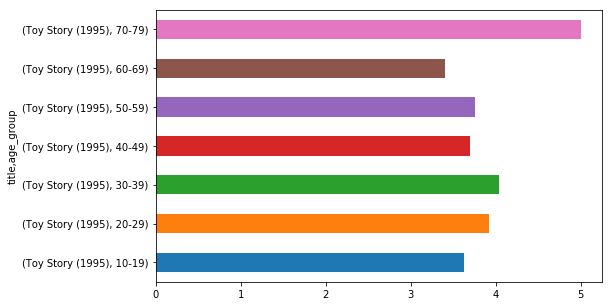

In [14]:
by_age['rating']['mean'].plot(kind="barh")

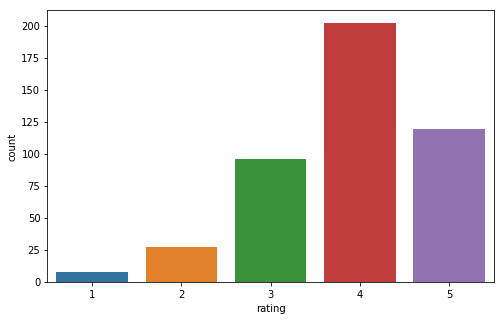

In [20]:
sns.countplot(movielens[movielens['movie_id'] == 1]['rating'])

In [26]:
pivoted = movielens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head(20)
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head(25)

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),3.600000,3.571429,-0.028571
7,Twelve Monkeys (1995),3.560976,3.861290,0.300315
8,Babe (1995),4.050000,3.974843,-0.075157
9,Dead Man Walking (1995),3.927711,3.884259,-0.043452


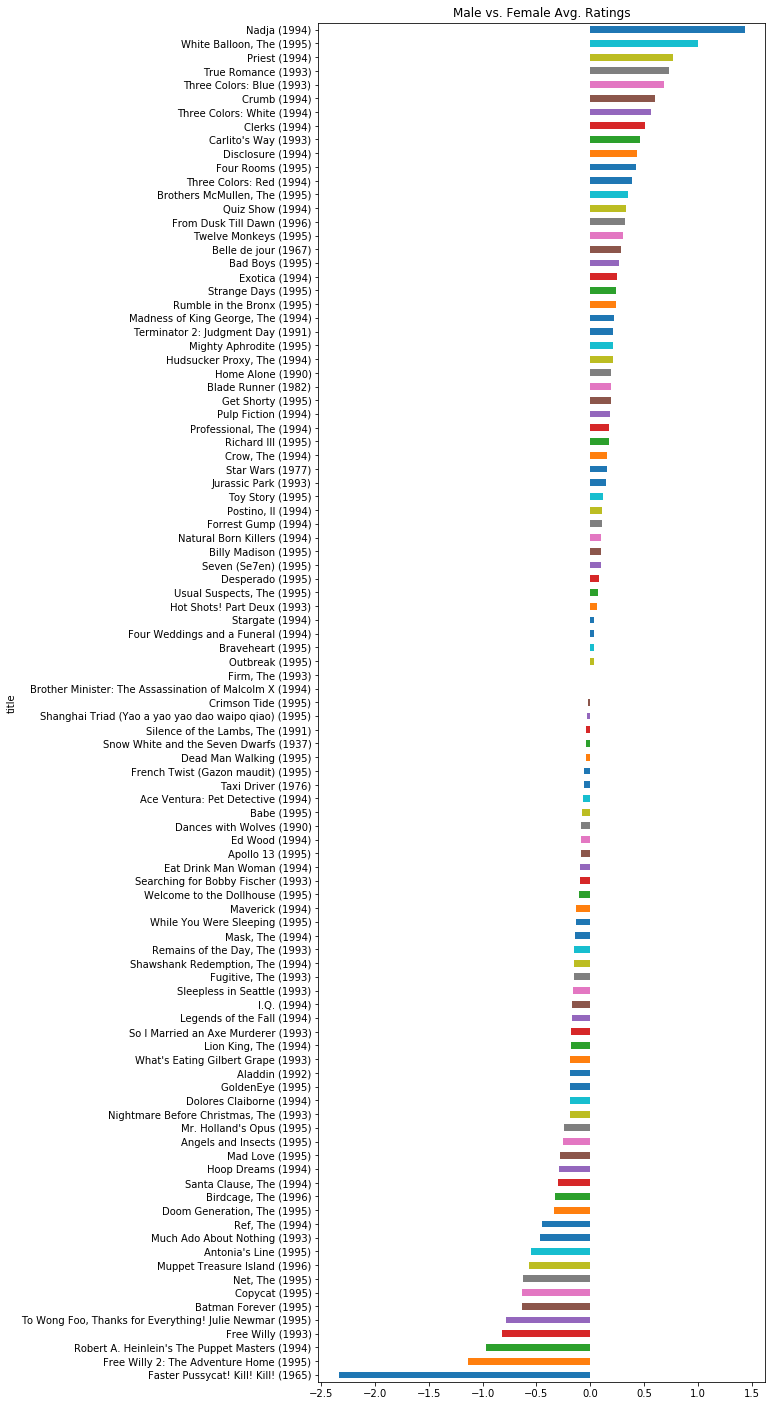

In [34]:
#pivoted.reset_index('movie_id', inplace=True)
disagreements = pivoted[pivoted.movie_id.isin(movielens.head(100).index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[8, 25],title=("Male vs. Female Avg. Ratings"))

# PySpark в рекомендательных системах

Импортируем необхрдимые библиотеки и инициализируем работу с PySpark

In [48]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
import sparkmonitor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
!jupyter nbextension install sparkmonitor --py --user --symlink 
!jupyter nbextension enable sparkmonitor --py --user            
!jupyter serverextension enable --py --user sparkmonitor
!ipython profile create && echo "c.InteractiveShellApp.extensions.append('sparkmonitor.kernelextension')" >>  $(ipython profile locate default)/ipython_kernel_config.py

conf.setAppName('MovieRecomendations')
conf.setMaster('local[*]')
sc=SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder.appName('MovieRecomendations').getOrCreate()

Installing /Users/lxdv/conda/lib/python3.7/site-packages/sparkmonitor/static -> sparkmonitor
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable sparkmonitor --user --py
    
Enabling notebook extension sparkmonitor/module...
      - Validating: OK
Enabling: sparkmonitor.serverextension
- Writing config: /Users/lxdv/.jupyter
    - Validating...
      sparkmonitor.serverextension  OK


In [3]:
spark

In [6]:
df = pd.read_csv('ml-100k/u.data', sep = '\t').iloc[:,:3]
df.columns = ['user_id', 'item_id', 'rating']

### Разделение на обучающую и тестовую выборки

In [51]:
train, test = train_test_split(movielens, test_size=0.33, random_state=7)

In [8]:
train_spark = spark.createDataFrame(train)
test_spark = spark.createDataFrame(test)

In [9]:
train_spark.show(5)

+-------+-------+------+
|user_id|item_id|rating|
+-------+-------+------+
|    447|    201|     2|
|    524|    443|     4|
|    401|    553|     5|
|    415|    195|     5|
|    268|    423|     2|
+-------+-------+------+
only showing top 5 rows



In [10]:
test_spark.show(5)

+-------+-------+------+
|user_id|item_id|rating|
+-------+-------+------+
|    433|    435|     4|
|    504|    622|     4|
|    720|    896|     5|
|     56|    746|     4|
|    520|    300|     4|
+-------+-------+------+
only showing top 5 rows



In [11]:
als = ALS(maxIter=15, userCol='user_id', itemCol='item_id', ratingCol='rating')

In [12]:
model = als.fit(train_spark)

In [13]:
predictions = model.transform(test_spark)
predictions.show(15)

+-------+-------+------+----------+
|user_id|item_id|rating|prediction|
+-------+-------+------+----------+
|    251|    148|     2| 2.8807847|
|    580|    148|     4| 3.4348736|
|     44|    148|     4|  2.997131|
|    606|    148|     3| 3.6266098|
|    916|    148|     2| 2.3865232|
|    222|    148|     2|  2.892114|
|    372|    148|     5| 3.4768257|
|    416|    148|     5| 3.5987098|
|    435|    148|     3| 3.1106458|
|      1|    148|     2|  2.532204|
|    328|    148|     3|  3.054013|
|    479|    148|     2| 2.7468448|
|    919|    148|     3| 2.9135015|
|     54|    148|     3| 3.5846078|
|    347|    148|     3| 3.0141964|
+-------+-------+------+----------+
only showing top 15 rows



In [14]:
predictions = predictions.toPandas()
predictions = predictions.dropna()

In [15]:
ALS_spark_score = mean_squared_error(predictions['rating'], predictions['prediction']) ** 0.5

In [16]:
'RMSE score by PySpark ALS = {}'.format(ALS_spark_score)

'RMSE score by PySpark ALS = 0.9390191048233817'

# Surprise в рекомендательных системах

In [7]:
from surprise import SVD, NMF, KNNBasic, SlopeOne, CoClustering
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [6]:
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.33, random_state=7)

In [81]:
algo = NMF()
algo.fit(trainset)

predictions = algo.test(testset)
NMF_score = accuracy.rmse(predictions)

'RMSE score Surprice NMF = {}'.format(NMF_score)

RMSE: 0.9642


'RMSE score Surprice NMF = 0.9642496929813744'

In [82]:
algo = SVD()
algo.fit(trainset)

predictions = algo.test(testset)
SVD_score = accuracy.rmse(predictions)

'RMSE score Surprice SVD = {}'.format(SVD_score)

RMSE: 0.9423


'RMSE score Surprice SVD = 0.9422620357542634'

In [84]:
algo = KNNBasic()
algo.fit(trainset)

predictions = algo.test(testset)
KNN_score = accuracy.rmse(predictions)

'RMSE score Surprice k-NN = {}'.format(KNN_score)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9824


'RMSE score Surprice k-NN = 0.9824237139566355'

In [85]:
algo = SlopeOne()
algo.fit(trainset)

predictions = algo.test(testset)
SlopeOne_score = accuracy.rmse(predictions)

'RMSE score Surprise SlopeOne = {}'.format(SlopeOne_score)

RMSE: 0.9469


'RMSE score Surprise SlopeOne = 0.9468953403352436'

In [9]:
algo = CoClustering()
algo.fit(trainset)

predictions = algo.test(testset)
CoClusterin_score = accuracy.rmse(predictions)

'RMSE score Surprise CoClustering = {}'.format(CoClusterin_score)

RMSE: 0.9697


'RMSE score Surprise CoClustering = 0.9697211140350102'

## Все результаты

### RMSE Score

- **PySpark ALS** - **0.937406584514755**
- **NMF** - 0.9642496929813744
- **SVD** - 0.9422620357542634
- **k-NN** - 0.9824237139566355
- **SlopeOne** - 0.9468953403352436
- **CoClustering** - 0.9731138744815514
- **NaiveBayes** - 1.083874635385364